# 꿈꾸는 인공지능 11강
* MobileNet V2 
* 전이학습 - 미리훈련된 모델을 다른 작업에 사용하기 위해 추가적인 학습을 수행시키는 기법 
* Kaggle - Dogs breed Identification

# 텐서플로우 불러오기 

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import PIL.Image as Image
import matplotlib.pyplot as plt
import cv2

# 수행 환경 확인 

In [ ]:
!nvidia-smi

Wed Aug 12 08:33:21 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.57       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Dog breed 데이터 불러오기
- Dog Breed Identification 
 - https://www.kaggle.com/c/dog-breed-identification

In [ ]:
tf.keras.utils.get_file('/content/labels.csv', 'http://bit.ly/2GDxsYS')
tf.keras.utils.get_file('/content/sample_submission.csv', 'http://bit.ly/2GGnMNd')
tf.keras.utils.get_file('/content/train.zip', 'http://bit.ly/31nIyel')
tf.keras.utils.get_file('/content/test.zip', 'http://bit.ly/2GHEsnO')

362848256/362841195 [==============================] - 8s 0us/step


'/content/test.zip'

In [ ]:
!unzip train.zip
!unzip test.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: test/82e41a906dbd9ec362a3d49cf6bbe645.jpg  
  inflating: test/82e5e34cc18b267ef7057cc92de8b44b.jpg  
  inflating: test/82e64f28df4fff22beb11e9a1e413212.jpg  
  inflating: test/82ec6bdf968a14923340179515ce5546.jpg  
  inflating: test/82ee3ee4dc01b33203a049c6c3338034.jpg  
  inflating: test/82f07a63a1f03ff9d8e0f4a8458caa93.jpg  
  inflating: test/82f5fb0bdaff30a4a3374e2d9915856c.jpg  
  inflating: test/82fbff1bd375474e3d4ec5cbfde3f9f0.jpg  
  inflating: test/8301c772feb7f4068473f0157ae58f9b.jpg  
  inflating: test/8307be57a9d76c1584e16801a39cb1dc.jpg  
  inflating: test/831a38bd2cfa0a093967d5b6c1ac09dc.jpg  
  inflating: test/831ef824af939f9754e3593638933b64.jpg  
  inflating: test/8322f53b29325419ef3bcf7cf10d7172.jpg  
  inflating: test/83233e2774e116ef34a04c53dd00a282.jpg  
  inflating: test/832cae23410e741ecd2014b3818ed7c4.jpg  
  inflating: test/833f90a3652b06607b55bd25c8d97457.jpg  
  inflating: test/8341f50a86c819b3cb8828740a97e7ef.j

# Dog breed 데이터 확인

In [ ]:
label_text = pd.read_csv('labels.csv')
print(label_text.head(10))

                                 id               breed
0  000bec180eb18c7604dcecc8fe0dba07         boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97               dingo
2  001cdf01b096e06d78e9e5112d419397            pekinese
3  00214f311d5d2247d5dfe4fe24b2303d            bluetick
4  0021f9ceb3235effd7fcde7f7538ed62    golden_retriever
5  002211c81b498ef88e1b40b9abf84e1d  bedlington_terrier
6  00290d3e1fdd27226ba27a8ce248ce85  bedlington_terrier
7  002a283a315af96eaea0e28e7163b21b              borzoi
8  003df8b8a8b05244b1d920bb6cf451f9             basenji
9  0042188c895a2f14ef64a918ed9c7b64  scottish_deerhound


In [ ]:
label_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10222 entries, 0 to 10221
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10222 non-null  object
 1   breed   10222 non-null  object
dtypes: object(2)
memory usage: 159.8+ KB


# Dog breed 이미지 데이터 확인 
  

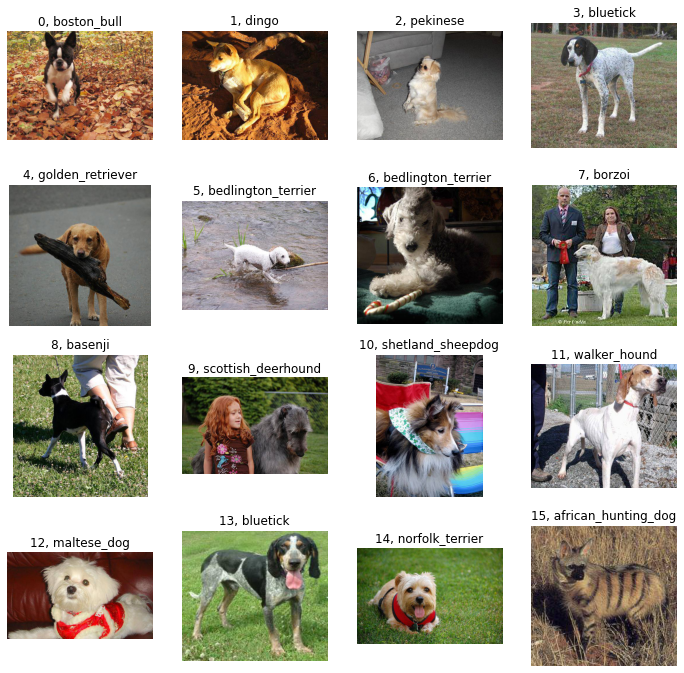

In [ ]:
plt.figure(figsize=(12,12))
for i in range(16):
    #loc[i번째 행,'id' 라는 열]
    image_id = label_text.loc[i, 'id']
    plt.subplot(4,4,i+1)
    #절대경로 설정을 활용하여 사진 출력 
    plt.imshow(plt.imread('/content/train/' + image_id + '.jpg'))
    #사진과 함께 번호(i) + 제목 ( loc[i,'breed'] ) 출력
    plt.title(str(i) + ', ' + label_text.loc[i, 'breed'])
    # 축 정보 표기 x
    plt.axis('off')
plt.show()

# 전이학습 첫 번째 실험
 * MobileNet V2 의 모든 계층의 가중치 초기화 
   - 즉, 신경망 구축 형식만 같고 **학습**은 되어있지 않는다. 

# MobileNet V2 불러오기
 - 2018년 google 이 개발한 신경망 모델 
  * ※ 현재 V3 까지 개발

* 참고 문헌 
  - MobileNet V2 : https://arxiv.org/pdf/1801.04381.pdf
  - MobileNet V1 : https://arxiv.org/pdf/1704.04861.pdf
  - https://ai.googleblog.com/2018/04/mobilenetv2-next-generation-of-on.html

In [ ]:
from tensorflow.keras.applications import MobileNetV2
mobile_v2 = MobileNetV2()

14540800/14536120 [==============================] - 0s 0us/step


# 모델 확인하기
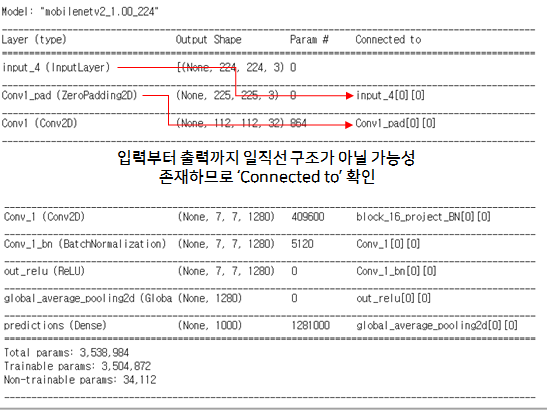

# MobileNet V2 의 가중치 초기화
* model.layers[1] : 레이어를 확인하는 방법 
* layer.trainable = True : 레이어의 학습 가능여부 설정
* layer.__ dict __ : 레이어에 속한 정보 확인 
* mobile_v2.layers[2].get_weights() :  각 신경망의 레이어가 갖는 가중치 정보 확인

In [ ]:
#사전 훈련된 신경망에 layers로 접근하여 마지막 dense 층 제외한 모든 가중치를 선택 
for layer in mobile_v2.layers[:-1]:
  #모든 레이어들을 'trainable(훈련가능)' 여부 True로 전환 
    layer.trainable = True


#마지막 레이어 제외한 모든 레이어에 접근 
for layer in mobile_v2.layers[:-1]: 
  #레이어에 커널이 존재하는 경우 확인 
    if 'kernel' in layer.__dict__:
    #가중치를 획득하여 가중치의 모양(shape)을 kernel_shape에 저장 
        kernel_shape = np.array(layer.get_weights()).shape
    #레이어의 가중치를 설정한다. '표준정규분포'.   
        layer.set_weights(tf.random.normal(kernel_shape, 0, 1))

# 이미지 불러오기 및 크기 변경

In [ ]:
import cv2
# 학습데이터 저장 리스트 생성 
train_X = []

#모든 이미지의 수 확인 
len(label_text)
# 모든 이미지만큼 반복 수행
for i in range(len(label_text)):
  #이미지 읽어들이기
    img = cv2.imread('/content/train/' + label_text['id'][i] + '.jpg')
  #이미지 크기 통일
    img = cv2.resize(img, dsize=(224, 224))
  #이미지 크기 최소-최대 정규화 (이미지 크기 축소)
    img = img / 255.0
  #빈 리스트에 학습 데이터 생성 
    train_X.append(img)

#학습 데이터의 차원 및 크기 확인 
train_X = np.array(train_X)
print(train_X.shape)
print(train_X.size * train_X.itemsize, ' bytes')

(10222, 224, 224, 3)
12309577728  bytes


#텍스트 라벨링 -> 숫자 라벨링 
 * unique() : 유일한 값 찾기   
 * tolist() : 리스트화
 * index() : 위치 반환
 

In [ ]:
label_text

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever
...,...,...
10217,ffd25009d635cfd16e793503ac5edef0,borzoi
10218,ffd3f636f7f379c51ba3648a9ff8254f,dandie_dinmont
10219,ffe2ca6c940cddfee68fa3cc6c63213f,airedale
10220,ffe5f6d8e2bff356e9482a80a6e29aac,miniature_pinscher


In [ ]:
#'breed'라는 속성값 안에 포함된 데이터 중 '유일 값'을 찾아 '리스트'로 전환하여 저장 
unique_Y = label_text['breed'].unique().tolist()

# 품종을 하나씩 반복하여 꺼내, 앞서 unique_Y에서 설정한 위치로 반환해 준다.  
train_Y = [unique_Y.index(breed) for breed in label_text['breed']]

#array 로 전환
train_Y = np.array(train_Y)

In [ ]:
print(train_Y[:10]) # 학습 데이터 결과변수 확인 
print(train_Y[-10:])

[0 1 2 3 4 5 5 6 7 8]
[34 87 91 63 48  6 93 63 77 92]


# 전이학습을 위한 간이 신경망 설정
* 레이어를 함수처럼 사용하는 구문 '케라스의 함수형 API'
 * tf.keras.Model(inputs = .input , outputs = )
 * 입력부터 출력까지 '일직선 구조' 가 아닐 가능성 존재
 * 모델의 입,출력 구조 재설계 input, output  
  (※ 이렇게 코드를 작성해주면 텐서플로우 내에서 스스로 다시 모델 재설계 
  
   단, 입출력의 관계가 맞지 않는 경우 에러 발생)

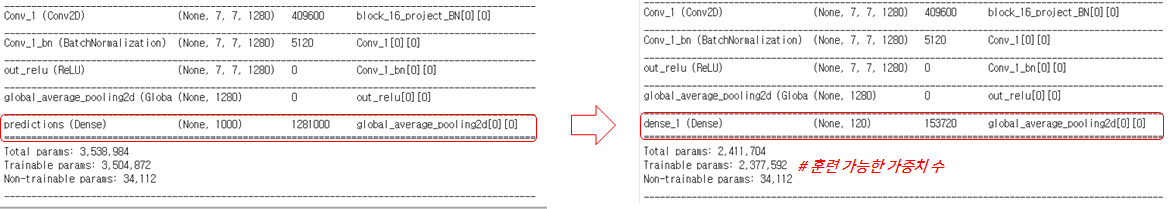

In [ ]:
# 마지막 Dense 레이어를 제거하기 위해 [-2].output 그리고 밖으로 빼내준다 .  
x = mobile_v2.layers[-2].output
# 예측을 위한 레이어 재정의 ( 예측 범주 1000 -> 120개 )
predictions = tf.keras.layers.Dense(1200, activation='softmax')(x)
#'입출력 구조' 재정의 
model = tf.keras.Model(inputs=mobile_v2.input, outputs=predictions)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________________

# 컴파일 단계
 * 경사하강법 최적화 : 'sgd'
 * 손실함수 : 'sparse_categorical_crossentropy'
 * 측정 항목 : 정확도


In [ ]:
model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# 학습 수행 


In [ ]:
history = model.fit(train_X, 
                    train_Y, 
                    epochs=10, 
                    validation_split=0.25, batch_size=32,
                    callbacks = [tf.keras.callbacks.EarlyStopping(patience = 5, monitor = 'val_loss')])

Epoch 1/10
240/240 [==============================] - 40s 166ms/step - loss: 6.6557 - accuracy: 0.0081 - val_loss: 8.9486 - val_accuracy: 0.0094
Epoch 2/10
240/240 [==============================] - 38s 159ms/step - loss: 6.1032 - accuracy: 0.0119 - val_loss: 7.8565 - val_accuracy: 0.0113
Epoch 3/10
240/240 [==============================] - 38s 160ms/step - loss: 5.7653 - accuracy: 0.0129 - val_loss: 7.3412 - val_accuracy: 0.0070
Epoch 4/10
240/240 [==============================] - 38s 159ms/step - loss: 5.3883 - accuracy: 0.0168 - val_loss: 7.4423 - val_accuracy: 0.0113
Epoch 5/10
240/240 [==============================] - 38s 160ms/step - loss: 5.1329 - accuracy: 0.0175 - val_loss: 7.5234 - val_accuracy: 0.0125
Epoch 6/10
240/240 [==============================] - 38s 159ms/step - loss: 4.9696 - accuracy: 0.0188 - val_loss: 7.3451 - val_accuracy: 0.0047
Epoch 7/10
240/240 [==============================] - 38s 160ms/step - loss: 4.8540 - accuracy: 0.0256 - val_loss: 7.7298 - val_ac

# 학습결과 시각화 비교 분석

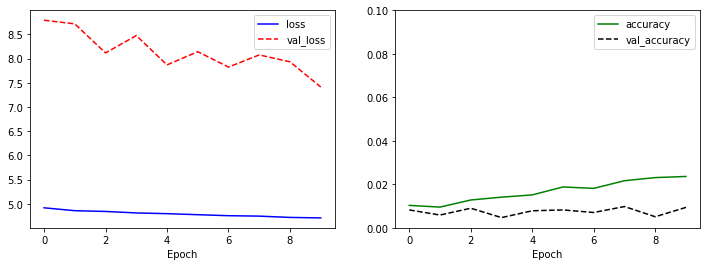

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0, 0.1)
plt.legend()

plt.show()

# 전이학습 두 번째 실험
 * MobileNet V2 의 일부 계층 가중치 초기화   
   - 첫 번째 계층부터 끝에서 20개는 사전학습된 가중치 사용.   
   - 마지막 20개는 기존 가중치에서 학습을 수행 

# 다시 MobileNet V2 불러오기

In [ ]:
from tensorflow.keras.applications import MobileNetV2
mobilev2 = MobileNetV2()

# 마지막 레이어 재정의
 * 분류 범주 1000 -> 120

In [ ]:
x = mobilev2.layers[-2].output
predictions = tf.keras.layers.Dense(120, activation='softmax')(x)
model = tf.keras.Model(inputs=mobilev2.input, outputs=predictions)

# 학습 가능 레이어 재설정

In [ ]:
x = [0,1,2,3,4,5,6,7,8,9]
print(x[ :-3])
print(x[-3:])

[0, 1, 2, 3, 4, 5, 6]
[7, 8, 9]


In [ ]:
# 뒤에서 20개까지의 레이어는 훈련 가능, 나머지는 가중치 고정
for layer in model.layers[:-20]:
    layer.trainable = False 
for layer in model.layers[-20:]:
    layer.trainable = True

# 레이어 확인 
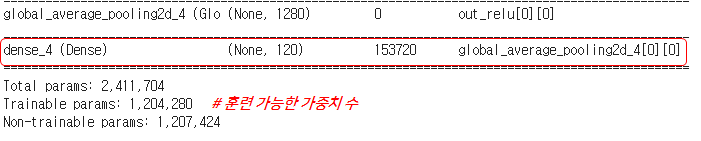

In [ ]:
model.summary()

# 컴파일 단계

In [ ]:
model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# 학습 수행


In [ ]:
history = model.fit(train_X,train_Y, epochs = 10, validation_split=0.25, batch_size=32)

Epoch 1/10
240/240 [==============================] - 11s 45ms/step - loss: 3.2451 - accuracy: 0.2899 - val_loss: 2.0618 - val_accuracy: 0.4437
Epoch 2/10
240/240 [==============================] - 10s 40ms/step - loss: 1.6289 - accuracy: 0.6050 - val_loss: 1.6276 - val_accuracy: 0.5372
Epoch 3/10
240/240 [==============================] - 10s 40ms/step - loss: 1.1904 - accuracy: 0.7028 - val_loss: 1.4720 - val_accuracy: 0.5865
Epoch 4/10
240/240 [==============================] - 10s 41ms/step - loss: 0.9478 - accuracy: 0.7711 - val_loss: 1.4200 - val_accuracy: 0.6017
Epoch 5/10
240/240 [==============================] - 10s 40ms/step - loss: 0.7687 - accuracy: 0.8264 - val_loss: 1.4035 - val_accuracy: 0.6033
Epoch 6/10
240/240 [==============================] - 10s 40ms/step - loss: 0.6317 - accuracy: 0.8690 - val_loss: 1.3497 - val_accuracy: 0.6138
Epoch 7/10
240/240 [==============================] - 10s 41ms/step - loss: 0.5285 - accuracy: 0.9014 - val_loss: 1.3329 - val_accuracy:

# 학습결과 시각화 비교분석

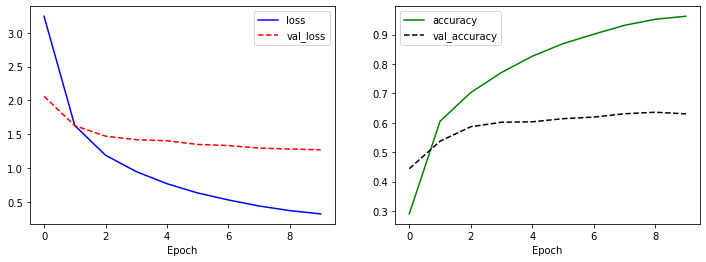

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()